In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import corner

from plot_utils import rcparams
plt.rcParams.update(rcparams)

In [2]:
collated_eos_gp0 = pd.read_csv(
    '../data/eos-draws-default/eos-draws-default.csv',
    index_col='eos'
)

collated_eos_gp0['ptov'] = np.loadtxt(
    '../data/eos-draws-default/quantities_at_n/pressure_ntov.dat'
)
collated_eos_gp0['etov'] = np.loadtxt(
    '../data/eos-draws-default/quantities_at_n/energy_density_ntov.dat'
)

collated_eos_gp0['p2'] = np.loadtxt(
    '../data/eos-draws-default/quantities_at_n/pressure_02nsat.dat'
)
collated_eos_gp0['p6'] = np.loadtxt(
    '../data/eos-draws-default/quantities_at_n/pressure_06nsat.dat'
)

astro_weights_gp0 = np.exp(
    collated_eos_gp0.logweight_total - collated_eos_gp0.logweight_total.max()
).values
astro_weights_gp0 /= max(astro_weights_gp0)

In [3]:
gp0_stacked = np.vstack([
    collated_eos_gp0['p2'].values,
    collated_eos_gp0['ptov'].values,
    collated_eos_gp0['etov'].values,
    collated_eos_gp0['Mmax'].values,
]).T

In [4]:
collated_eos_gp2 = pd.read_csv(
    '../data/eos-draws-modified/gp2/eos-draws-modified-gp2.csv',
    index_col='eos'
)

collated_eos_gp2['ptov'] = np.loadtxt(
    '../data/eos-draws-modified/gp2/quantities_at_n/pressure_ntov.dat'
)
collated_eos_gp2['etov'] = np.loadtxt(
    '../data/eos-draws-modified/gp2/quantities_at_n/energy_density_ntov.dat'
)

collated_eos_gp2['p2'] = np.loadtxt(
    '../data/eos-draws-modified/gp2/quantities_at_n/pressure_02nsat.dat'
)

astro_weights_gp2 = np.exp(
    collated_eos_gp2.logweight_total - collated_eos_gp2.logweight_total.max()
).values
astro_weights_gp2 /= max(astro_weights_gp2)

In [5]:
gp2_stacked = np.vstack([
    collated_eos_gp2['p2'].values,
    collated_eos_gp2['ptov'].values,
    collated_eos_gp2['etov'].values,
    collated_eos_gp2['Mmax'].values,
]).T

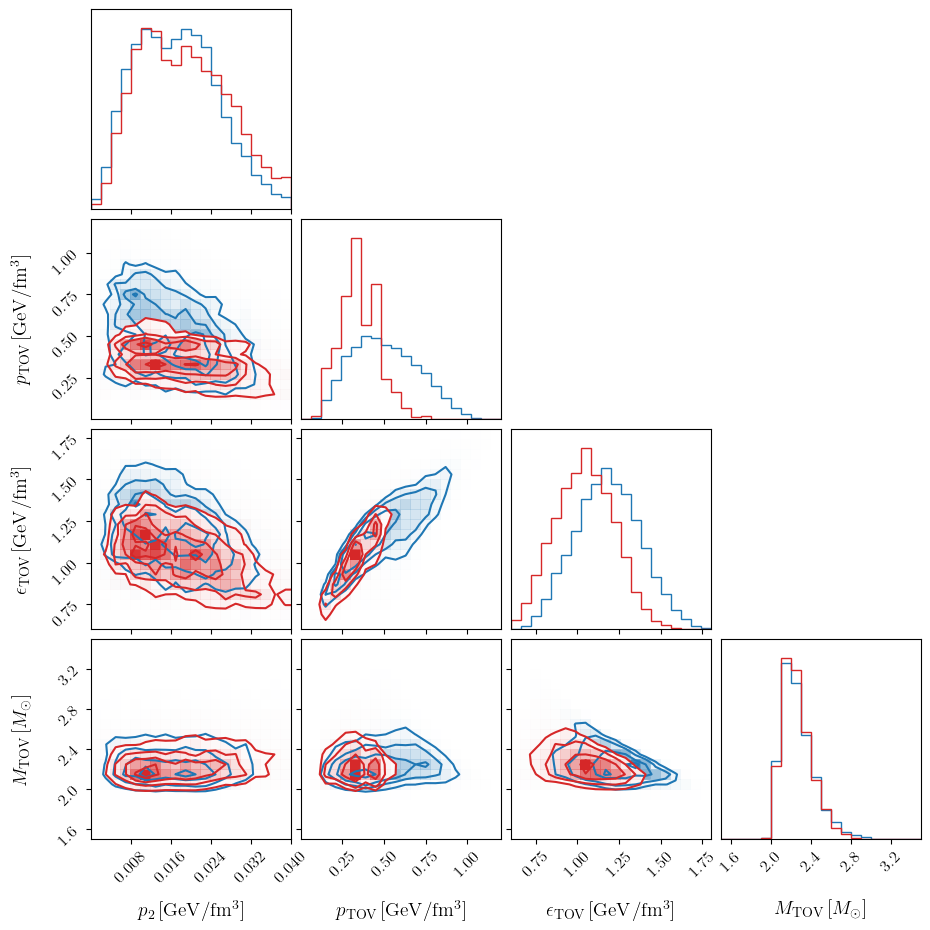

In [6]:
ranges = [
    (0, 0.04),
    (0, 1.2),
    (0.6, 1.8),
    (1.5, 3.5)
]

labels = [
    '$p_2 \, [\mathrm{GeV/fm^{3}}]$',
    '$p_\mathrm{TOV} \, [\mathrm{GeV/fm^{3}}]$',
    '$\epsilon_\mathrm{TOV} \, [\mathrm{GeV/fm^{3}}]$',
    '$M_\mathrm{TOV} \, [M_{\odot}]$'
]

fig = corner.corner(
    gp0_stacked,
    labels=labels,
    range=ranges,
    weights=astro_weights_gp0,
    color='C0',
    plot_datapoints=False,
    hist_kwargs={'density': True},
)

corner.corner(
    gp2_stacked,
    range=ranges,
    weights=astro_weights_gp2,
    color='C3',
    plot_datapoints=False,
    fig=fig,
    hist_kwargs={'density': True},
);

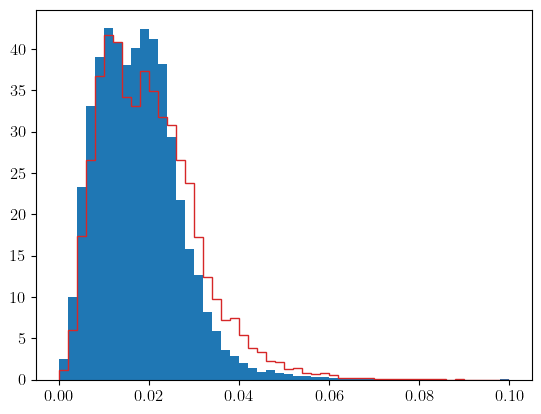

In [7]:
fig, ax = plt.subplots()

ax.hist(
    collated_eos_gp0['p2'].values, 
    range=(0, 0.1), 
    weights=astro_weights_gp0,
    bins=50,
    density=True,
)

ax.hist(
    collated_eos_gp2['p2'].values, 
    range=(0, 0.1), 
    weights=astro_weights_gp2,
    bins=50,
    color='C3',
    histtype='step',
    density=True,
);